***Q-1. Imagine you have a dataset where you have different Instagram features like u sername , Caption , Hashtag , Followers , Time_Since_posted , and likes , now your task is to predict the number of likes and Time Since posted and the rest of the features are 
your input features. Now you have to build a model which can predict the number of likes and Time Since posted. 
Dataset This is the Dataset You can use this dataset for this question. ***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from numpy import absolute
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("instagram_reach.csv")

In [4]:
df

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30
...,...,...,...,...,...,...,...,...
95,8,19,michaelgarza__,"328 S. Wetherly Drive, Beverly Hills, CA 90212...",614,#beverlyhills #realestate#losangelesrealestate...,3 hours,31
96,9,21,dvlp_search,Credit @tristankappel To find more dvlp follow...,450,#workspace #work #developer#development #devel...,3 hours,42
97,10,22,ecom.space,We are coming up with the Best 21 Books that w...,182,#books #book #motivation #inspiration #life#bo...,3 hours,10
98,11,24,lb3enterprises,We’re only paid to move dirt once. It’s not ju...,2039,#heavyequipment #underconstruction#dozer #real...,3 hours,222


In [5]:
df =df.drop(["Unnamed: 0", "S.No"], axis=1)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Followers,100.0,961.96,1014.62567,11.0,252.75,612.0,1197.0,4496.0
Likes,100.0,46.48,55.08698,8.0,19.00,29.0,46.0,349.0


In [7]:
df.describe()

,Followers,Likes
count,100.00000,100.00000
mean,961.96000,46.48000
std,1014.62567,55.08698
min,11.00000,8.00000
25%,252.75000,19.00000
50%,612.00000,29.00000
75%,1197.00000,46.00000
max,4496.00000,349.00000


In [8]:
#check info of data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   USERNAME           100 non-null    object
 1   Caption            94 non-null     object
 2   Followers          100 non-null    int64 
 3   Hashtags           100 non-null    object
 4   Time since posted  100 non-null    object
 5   Likes              100 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 4.8+ KB
None


In [9]:
df.columns

Index(['USERNAME', 'Caption', 'Followers', 'Hashtags', 'Time since posted',
       'Likes'],
      dtype='object')

In [10]:
#only Caption column that has missing values so missing values will be dropped
df=df.dropna()

In [11]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94 entries, 0 to 99
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   USERNAME           94 non-null     object
 1   Caption            94 non-null     object
 2   Followers          94 non-null     int64 
 3   Hashtags           94 non-null     object
 4   Time since posted  94 non-null     object
 5   Likes              94 non-null     int64 
dtypes: int64(2), object(4)
memory usage: 5.1+ KB
None


In [13]:
#Times since posted will be better if in type of int/float, so it will be changed
Time_since_posted_in_hours=[]

for i in df['Time since posted']:
    Time_since_posted_in_hours.append(i.replace('hours', ''))

df.rename(columns={'USERNAME':'Username'}, inplace=True)
se = pd.Series(Time_since_posted_in_hours)
df['Times since posted (hours)'] = se.values
df['Times since posted (hours)'] = pd.to_numeric(df['Times since posted (hours)'])
df = df.drop('Time since posted', axis=1)

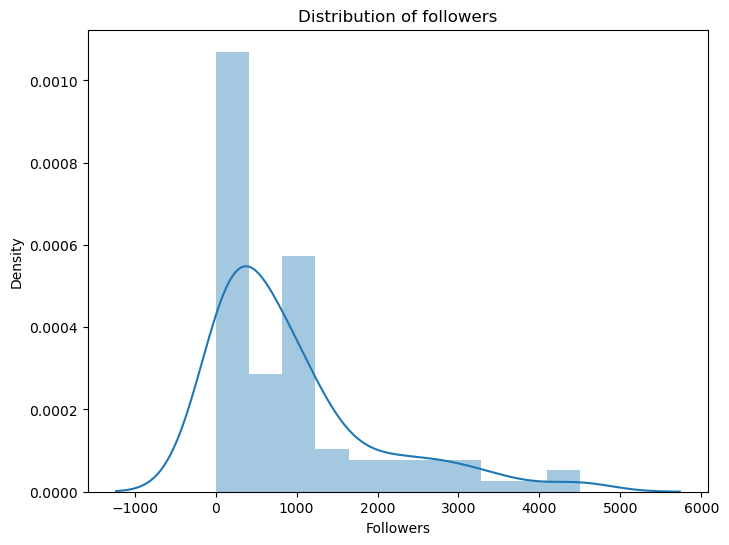

In [15]:
#Distribution of followers variable
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.distplot(df['Followers'])
plt.title("Distribution of followers")
plt.show()

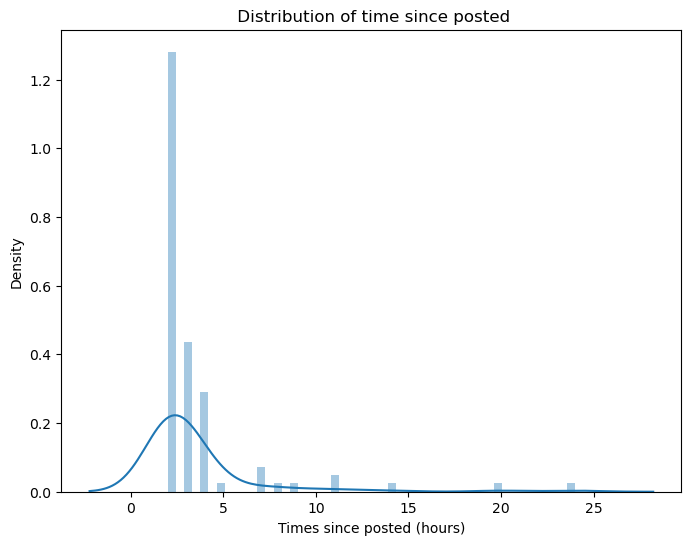

In [17]:
plt.figure(figsize=(8,6))
sns.distplot(df['Times since posted (hours)'])
plt.title(' Distribution of time since posted')
plt.show()

In [18]:
print('There are', df['Username'].nunique(), 'username')

There are 90 username


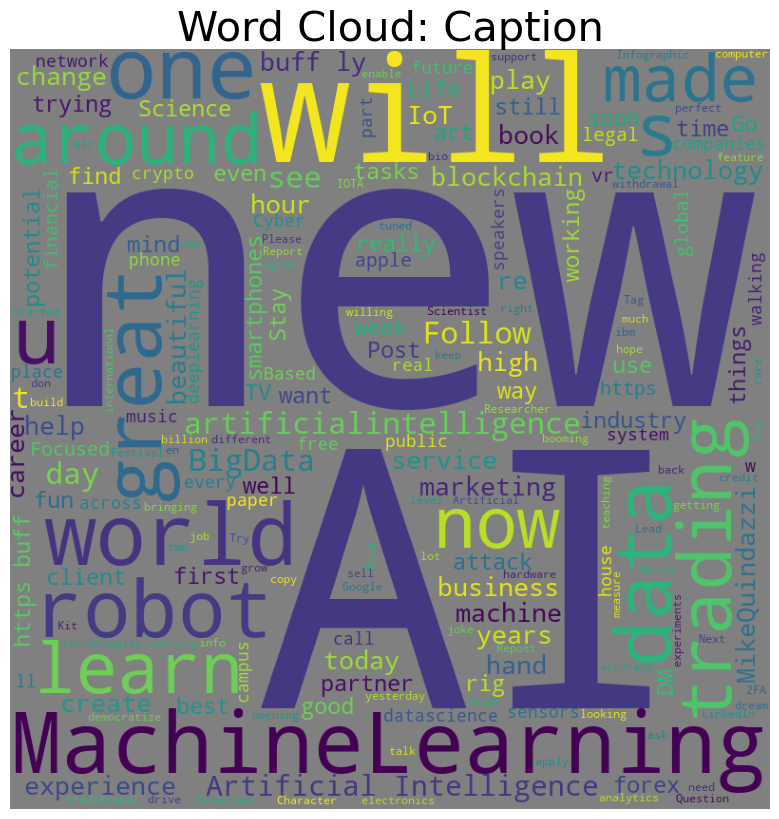

In [19]:
# lets know what people in this data set are talking about
def WordCloudPlotter(dfColumn):
    colData = df[dfColumn]
    textCloud = ''
    
    #text processing
    # converting colums to a 
    #single line of text
    for mem in colData:
        textCloud = textCloud + str(mem)
    
    # plotting word cloud
    wordcloud = WordCloud(width = 800, height = 800,background_color ='grey', 
                          stopwords = STOPWORDS,  min_font_size = 10).generate(textCloud)
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.rcParams.update({'font.size': 25})
    plt.axis("off") 
    plt.title('Word Cloud: ' + str(dfColumn))
    plt.tight_layout(pad = 0) 
  
    plt.show() 
WordCloudPlotter("Caption")

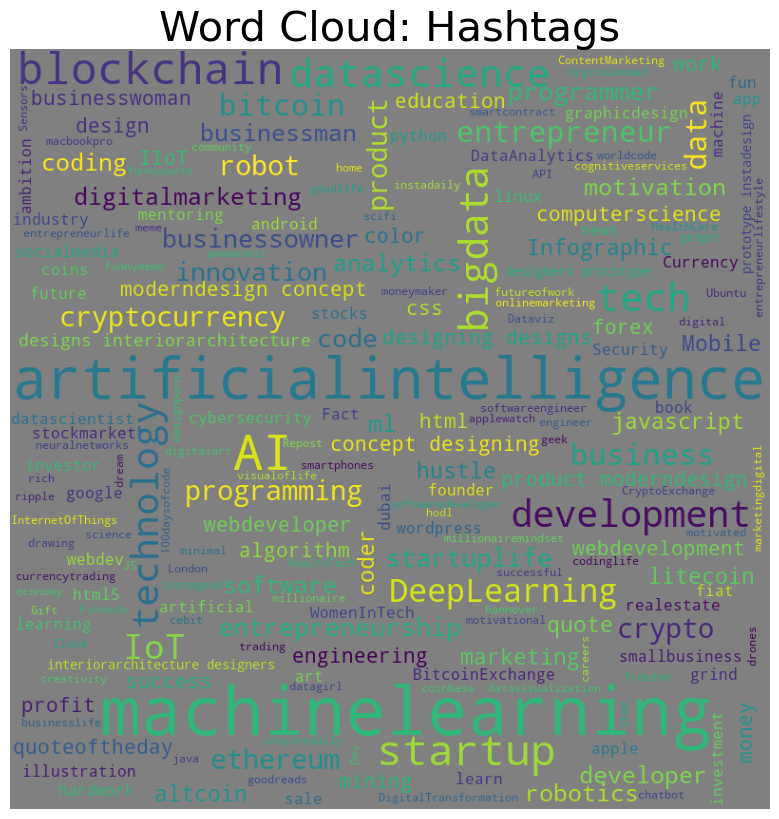

In [20]:
WordCloudPlotter("Hashtags")

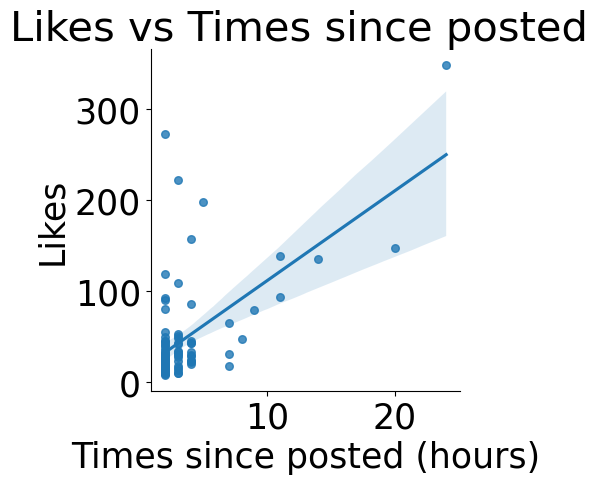

In [26]:
sns.lmplot(x='Times since posted (hours)', y='Likes', data=df, fit_reg=True, scatter_kws={"marker": "D", "s": 30})

plt.title('Likes vs Times since posted ')
plt.xlabel('Times since posted (hours)')
plt.ylabel('Likes')
plt.show()

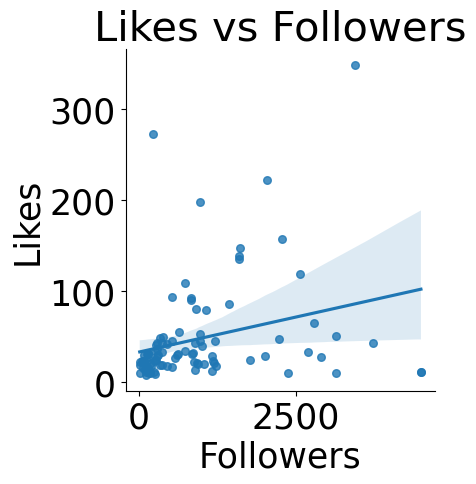

In [28]:
sns.lmplot(x='Followers', y='Likes', data=df, fit_reg=True, scatter_kws={"marker": "D", "s": 30})

plt.title('Likes vs Followers')
plt.xlabel('Followers')
plt.ylabel('Likes')
plt.show()

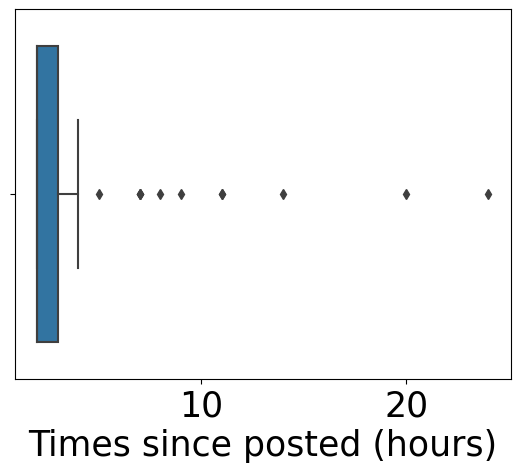

In [30]:
# Boxplot to check outliers
sns.boxplot(df['Times since posted (hours)'])
plt.show()

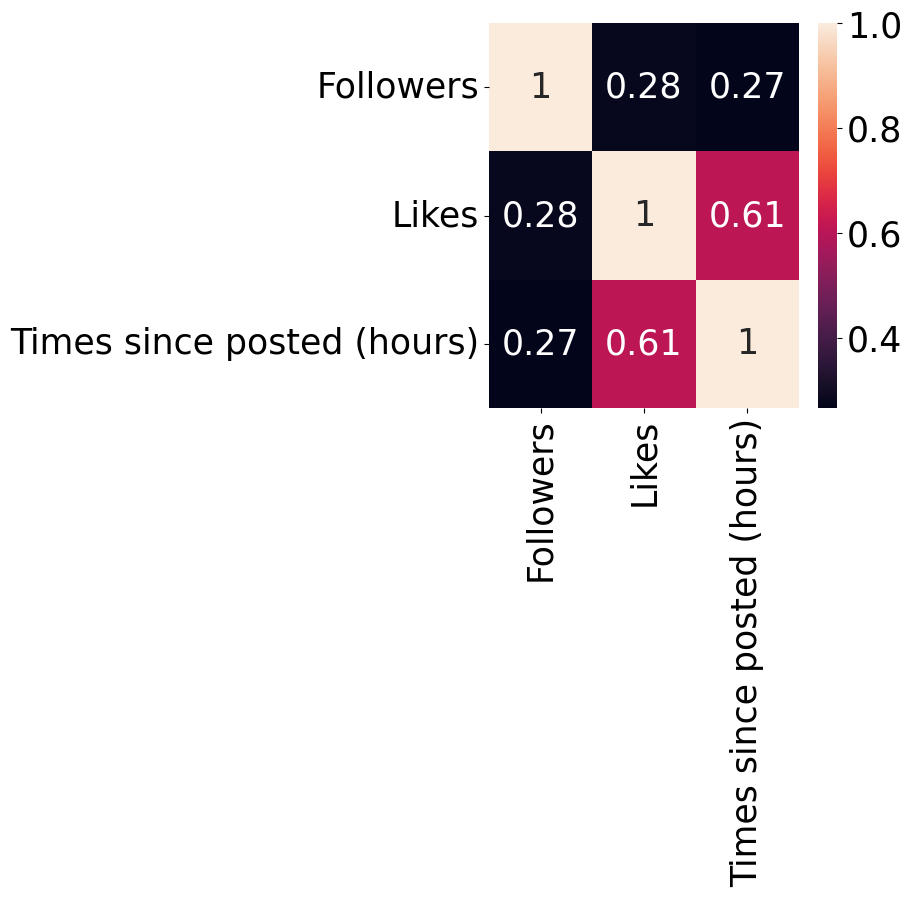

In [34]:
plt.figure(figsize=(5, 5))
correlation_matrix = df.corr()
sns.heatmap(df.corr() , annot=True)
plt.show()

In [36]:
#Define x variables and y variable
x = df[['Followers', 'Times since posted (hours)']]
y = df['Likes']
df.head()

,Username,Caption,Followers,Hashtags,Likes,Times since posted (hours)
0,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,139,11
1,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,23,2
2,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,25,2
3,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,49,3
4,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,30,3


In [37]:
#Split train set and test set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [38]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

#Define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)
#Evaluate the model
scores = cross_val_score(lin_reg, X_test, y_test, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
#Absolute MAE
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

Mean MAE: 17.737 (11.099)


In [39]:
#Fit the model and predict the value of test set
model = XGBRegressor()
model.fit(X_train, y_train)

#Define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)
#Evaluate the model
scores = cross_val_score(model, X_test, y_test, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
#Absolute MAE
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()))

Mean MAE: 18.272 (8.974)


In [40]:
#check coefficient of determination of linear regression model
r_sq = lin_reg.score(x, y)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.3814063866179843


In [44]:
#Predict new value using XGBoost
X_new = np.array([[240, 7]])
model.predict(X_new)

array([0.13489202], dtype=float32)